# Spam Filter

## Treating data

In [60]:
import pandas as pd

In [61]:
data_path = './data/spam.csv'

data = pd.read_csv(data_path, encoding='latin-1')

#adding unnamed columns to v2
data['v2'] = data['v2'] + data['Unnamed: 2'].fillna('') + data['Unnamed: 3'].fillna('') + data['Unnamed: 4'].fillna('')

#dropping unnamed columns
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

#descaptaizing v2
data['v2'] = data['v2'].str.lower()

#renaming columns
data.columns = ['label', 'text']

#transforming label to binary
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

test_data = data.sample(frac=0.2).reset_index(drop=True)
train_data = data.drop(test_data.index).reset_index(drop=True)

#shuffling test_data
test_data = test_data.sample(frac=1).reset_index(drop=True)

#doubling the spam data
spam = train_data[train_data['label'] == 1]

#shuffling train_data
train_data = train_data.sample(frac=1).reset_index(drop=True)

#removing some ham train_data
ham = train_data[train_data['label'] == 0]
train_data = ham.sample(frac=0.5).reset_index(drop=True)
train_data = pd.concat([train_data, spam])

#shuffling train_data again
train_data = train_data.sample(frac=1).reset_index(drop=True)

#saving data, train and test
data.to_csv('./data/spam_clean.csv', index=False)
train_data.to_csv('./data/spam_train.csv', index=False)
test_data.to_csv('./data/spam_test.csv', index=False)

# train_data['label'].value_counts()
# test_data['label'].value_counts()

## Generating training and testing data

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
X_train = cv.fit_transform(train_data['text'])
X_train = pd.DataFrame(X_train.toarray(), columns=cv.vocabulary_.keys())
y_train = train_data['label']

X_test = cv.transform(test_data['text'])
X_test = pd.DataFrame(X_test.toarray(), columns=cv.vocabulary_.keys())
y_test = test_data['label']

## Naive Bayes

              precision    recall  f1-score   support

           0   0.996881  0.990702  0.993782       968
           1   0.940789  0.979452  0.959732       146

    accuracy                       0.989228      1114
   macro avg   0.968835  0.985077  0.976757      1114
weighted avg   0.989530  0.989228  0.989320      1114



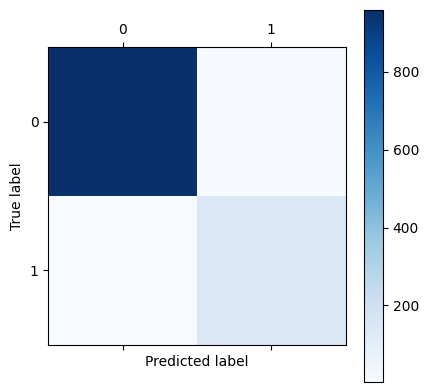

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Classification Report with more decimal places
print(classification_report(y_test, y_pred, digits=6))

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(conf_matrix, cmap='Blues')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


## Random Forest

              precision    recall  f1-score   support

           0   0.996901  0.996901  0.996901       968
           1   0.979452  0.979452  0.979452       146

    accuracy                       0.994614      1114
   macro avg   0.988176  0.988176  0.988176      1114
weighted avg   0.994614  0.994614  0.994614      1114



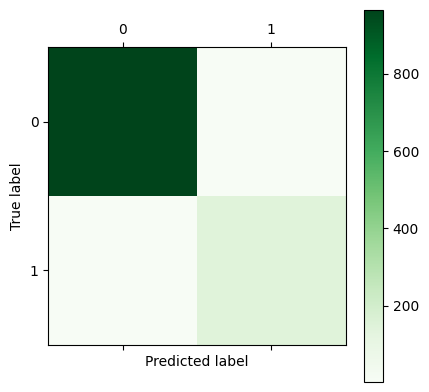

In [64]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Classification Report
print(classification_report(y_test, y_pred, digits=6))

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(conf_matrix, cmap='Greens')

plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## K-nearest neighbors

              precision    recall  f1-score   support

           0   0.928023  0.998967  0.962189       968
           1   0.986111  0.486301  0.651376       146

    accuracy                       0.931777      1114
   macro avg   0.957067  0.742634  0.806783      1114
weighted avg   0.935636  0.931777  0.921454      1114



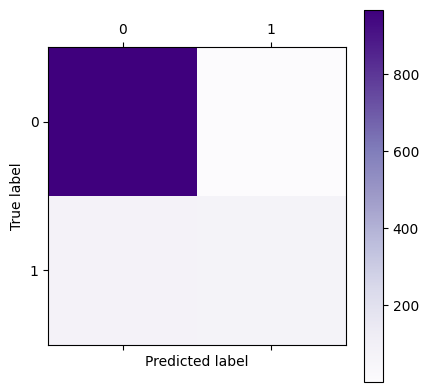

In [65]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Classification Report
print(classification_report(y_test, y_pred, digits=6))

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.matshow(conf_matrix, cmap='Purples')
plt.colorbar()

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()

## Logistic Regression

              precision    recall  f1-score   support

           0   0.996910  1.000000  0.998453       968
           1   1.000000  0.979452  0.989619       146

    accuracy                       0.997307      1114
   macro avg   0.998455  0.989726  0.994036      1114
weighted avg   0.997315  0.997307  0.997295      1114



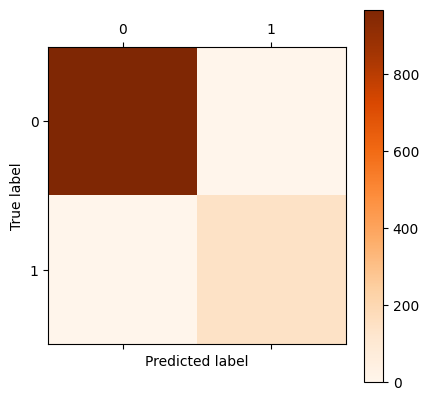

In [66]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Classification Report
print(classification_report(y_test, y_pred, digits=6))

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.matshow(conf_matrix, cmap='Oranges')
plt.colorbar()

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.show()